In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers

In [2]:
#print versions
!python --version
print('Numpy' + np.__version__)
print('TensorFlow ' + tf.__version__)
print('Keras ' + tf.keras.__version__)

Python 3.7.9
Numpy1.20.1
TensorFlow 2.3.0
Keras 2.4.0


In [18]:
# Settings
nsamples = 1000 # number of samples to use as a dataset
val_ratio = 0.2 # Percentage of samples that should be held for validation set
test_ratio = 0.2 # Percentage of samples that should be held for test set
tflite_model_name = 'sine_model' # Will be given .tflite suffix
c_model_name = 'sine_model' # Will be give .h suffix
tf_model_file_name = 'sine_model_tf'

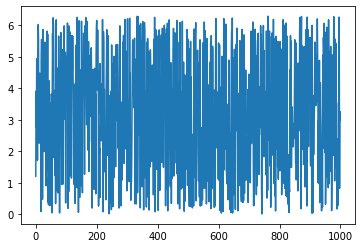

In [4]:
#Generate some random smaples
np.random.seed(1234)
x_values = np.random.uniform(low = 0, high = (2*math.pi), size = nsamples)
plt.plot(x_values)

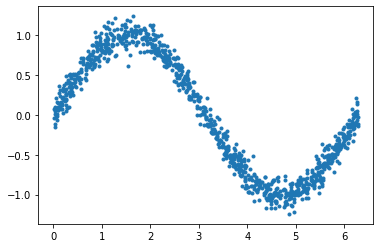

In [5]:
#Create a noisy sinewave with these values
y_values = np.sin(x_values) +(0.1 * np.random.randn(x_values.shape[0]))
plt.plot(x_values, y_values,'.')

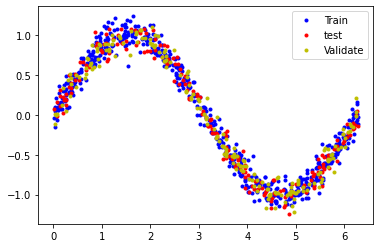

In [6]:
#Plit the dataset into traing, validation, and test sets
val_split = int(val_ratio * nsamples)
test_split = int(val_split + (test_ratio * nsamples))
x_val, x_test, x_train = np.split(x_values, [val_split, test_split])
y_val, y_test, y_train = np.split(y_values, [val_split, test_split])

#Check that our splits add up correctly
assert(x_train.size + x_val.size + x_test.size) == nsamples

#plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="test")
plt.plot(x_val, y_val,'y.', label="Validate")
plt.legend()
plt.show()

In [7]:
#Create a model
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [9]:
#add optimizer, loss function, and metrics to model and compile it
model.compile(optimizer='rmsprop', loss='mae',metrics=['mae'])

#train model
history = model.fit(x_train, y_train,
                   epochs=500, batch_size=100, validation_data = (x_val,y_val))

Epoch 1/500
6/6 [==============================] - 0s 23ms/step - loss: 2.0034 - mae: 2.0034 - val_loss: 1.7079 - val_mae: 1.7079
Epoch 2/500
6/6 [==============================] - 0s 3ms/step - loss: 1.5440 - mae: 1.5440 - val_loss: 1.3376 - val_mae: 1.3376
Epoch 3/500
6/6 [==============================] - 0s 3ms/step - loss: 1.2182 - mae: 1.2182 - val_loss: 1.0270 - val_mae: 1.0270
Epoch 4/500
6/6 [==============================] - 0s 3ms/step - loss: 0.9444 - mae: 0.9444 - val_loss: 0.7678 - val_mae: 0.7678
Epoch 5/500
6/6 [==============================] - 0s 3ms/step - loss: 0.7087 - mae: 0.7087 - val_loss: 0.5598 - val_mae: 0.5598
Epoch 6/500
6/6 [==============================] - 0s 4ms/step - loss: 0.5666 - mae: 0.5666 - val_loss: 0.4924 - val_mae: 0.4924
Epoch 7/500
6/6 [==============================] - 0s 3ms/step - loss: 0.5169 - mae: 0.5169 - val_loss: 0.4772 - val_mae: 0.4772
Epoch 8/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4993 - mae: 0.4993 - va

6/6 [==============================] - 0s 3ms/step - loss: 0.3001 - mae: 0.3001 - val_loss: 0.3222 - val_mae: 0.3222
Epoch 65/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2988 - mae: 0.2988 - val_loss: 0.3244 - val_mae: 0.3244
Epoch 66/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2960 - mae: 0.2960 - val_loss: 0.3275 - val_mae: 0.3275
Epoch 67/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2976 - mae: 0.2976 - val_loss: 0.3231 - val_mae: 0.3231
Epoch 68/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2993 - mae: 0.2993 - val_loss: 0.3365 - val_mae: 0.3365
Epoch 69/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2982 - mae: 0.2982 - val_loss: 0.3245 - val_mae: 0.3245
Epoch 70/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2979 - mae: 0.2979 - val_loss: 0.3232 - val_mae: 0.3232
Epoch 71/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3001 - mae: 0.3001 - val_loss

Epoch 127/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2984 - mae: 0.2984 - val_loss: 0.3224 - val_mae: 0.3224
Epoch 128/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2949 - mae: 0.2949 - val_loss: 0.3227 - val_mae: 0.3227
Epoch 129/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2953 - mae: 0.2953 - val_loss: 0.3218 - val_mae: 0.3218
Epoch 130/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2943 - mae: 0.2943 - val_loss: 0.3188 - val_mae: 0.3188
Epoch 131/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3034 - mae: 0.3034 - val_loss: 0.3188 - val_mae: 0.3188
Epoch 132/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2972 - mae: 0.2972 - val_loss: 0.3210 - val_mae: 0.3210
Epoch 133/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2949 - mae: 0.2949 - val_loss: 0.3330 - val_mae: 0.3330
Epoch 134/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2976 - m

6/6 [==============================] - 0s 3ms/step - loss: 0.3004 - mae: 0.3004 - val_loss: 0.3156 - val_mae: 0.3156
Epoch 252/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2957 - mae: 0.2957 - val_loss: 0.3149 - val_mae: 0.3149
Epoch 253/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2961 - mae: 0.2961 - val_loss: 0.3216 - val_mae: 0.3216
Epoch 254/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2945 - mae: 0.2945 - val_loss: 0.3229 - val_mae: 0.3229
Epoch 255/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2952 - mae: 0.2952 - val_loss: 0.3160 - val_mae: 0.3160
Epoch 256/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2994 - mae: 0.2994 - val_loss: 0.3209 - val_mae: 0.3209
Epoch 257/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2961 - mae: 0.2961 - val_loss: 0.3182 - val_mae: 0.3182
Epoch 258/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2958 - mae: 0.2958 - v

6/6 [==============================] - 0s 3ms/step - loss: 0.2966 - mae: 0.2966 - val_loss: 0.3241 - val_mae: 0.3241
Epoch 376/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2951 - mae: 0.2951 - val_loss: 0.3417 - val_mae: 0.3417
Epoch 377/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2957 - mae: 0.2957 - val_loss: 0.3297 - val_mae: 0.3297
Epoch 378/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2985 - mae: 0.2985 - val_loss: 0.3201 - val_mae: 0.3201
Epoch 379/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2948 - mae: 0.2948 - val_loss: 0.3241 - val_mae: 0.3241
Epoch 380/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2974 - mae: 0.2974 - val_loss: 0.3182 - val_mae: 0.3182
Epoch 381/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2942 - mae: 0.2942 - val_loss: 0.3219 - val_mae: 0.3219
Epoch 382/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2989 - mae: 0.2989 - v

6/6 [==============================] - 0s 2ms/step - loss: 0.2947 - mae: 0.2947 - val_loss: 0.3172 - val_mae: 0.3172
Epoch 500/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2969 - mae: 0.2969 - val_loss: 0.3211 - val_mae: 0.3211


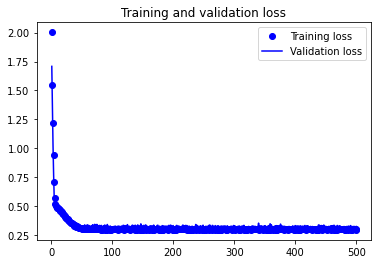

In [10]:
#plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(1,len(loss) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

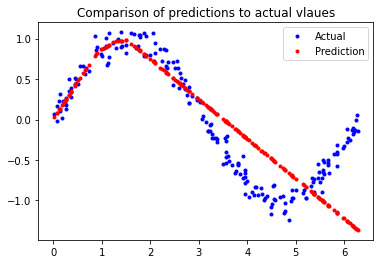

In [11]:
predictions = model.predict(x_test)

plt.clf()
plt.title("Comparison of predictions to actual vlaues")
plt.plot(x_test, y_test,'b.',label='Actual')
plt.plot(x_test, predictions, 'r.', label='Prediction')
plt.legend()
plt.show()

In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open(tflite_model_name+'.tflite','wb').write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\S1SECOM\AppData\Local\Temp\tmpzbp04iyj\assets


2896

In [13]:
#Function : Convert some hex value into an array for C programing
def hex_to_c_array(hex_data,var_name):
    
    c_str=''
    
    #Create header guard
    c_str +='#ifndef ' + var_name.upper() +'_H\n'
    c_str +='#define ' + var_name.upper() +'_H\n\n'
    
    # Add array length at top of file
    c_str +='\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) +';\n'
    
    #Declare C variable
    c_str +='unsigned char ' + var_name +'[ ] = {'
    hex_array = []
    for i, val in enumerate(hex_data):
        
        #Construct string from hex
        hex_str = format(val, '#04x')
        
        #Add formatting so each line stays within 80 chacters
        if(i+1)<len(hex_data):
            hex_str +=','
        if(i+1)%12 == 0:
            hex_str += '\n '
        hex_array.append(hex_str)
        
    #Add closing brace
    c_str += '\n' + format(' '.join(hex_array)) + '\n};\n\n'

    #Close out header guard
    c_str +='#endif //' + var_name.upper() +'_H'

    return c_str

In [14]:
#Write TFLite model to a C source (or Header) file
with open(c_model_name +'.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))

In [15]:
model.predict(np.array([0.0,1.0,2.0,3.0,4.0,5.0,6.0]))

array([[ 0.02936688],
       [ 0.8698776 ],
       [ 0.7460539 ],
       [ 0.2528562 ],
       [-0.24034107],
       [-0.7335387 ],
       [-1.2267361 ]], dtype=float32)

In [19]:
model.save(tf_model_file_name + '.h5')